# Kaggle: Fetal Health Classification
-----

The following analysis was conducted to help build a classifier capabale of effectively determining and classifying the fetal health of a newly-born baby using the following variables:

* Baseline Fetal Heart Rate (FHR)

* accelerations: Number of accelerations per second

* fetal_movement: Number of fetal movements per second

* uterine_contractions: Number of uterine contractions per second

* light_decelerations: Number of LDs per second

* severe_decelerations: Number of SDs per second

* prolongued_decelerations: Number of PDs per second

* abnormal_short_term_variability: Percentage of time with abnormal short term variability

The data can be found here: https://www.kaggle.com/andrewmvd/fetal-health-classification

In [1]:
#install libraries for oversampling
!pip install delayed
!pip install imblearn

In [2]:
#import necessary libraries for data wrangling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning libraries and modules
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn import metrics
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import classification_report, plot_roc_curve, auc, plot_confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


In [3]:
#read data
data = pd.read_csv(r'C:\Users\Atrey\Documents\fetal_health.csv')

In [32]:
#view sample of data
data.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
#check data types
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [6]:
#check shape
data.shape

(2126, 22)

In [7]:
#check for null values
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## Fetal Health:
* 1: Normal
* 2: Suspect
* 3: Pathological

In [8]:
#include necessary columns
data_necessary = data.loc[:,'baseline value':'abnormal_short_term_variability']
data_necessary['fetal health'] = data['fetal_health']
data_necessary

<ipython-input-8-709ed5255e78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_necessary['fetal health'] = data['fetal_health']


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,fetal health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,2.0


## Exploratory Analysis
-----

<AxesSubplot:>

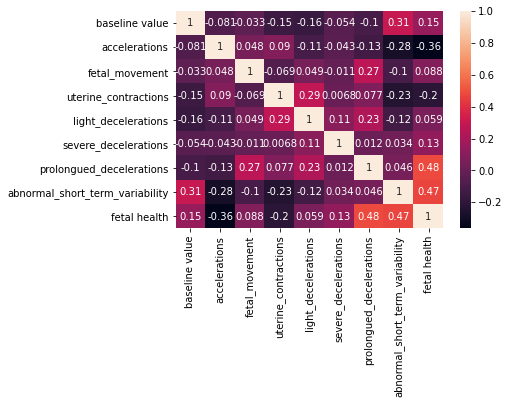

In [9]:
sns.heatmap(data_necessary.corr(), annot=True)

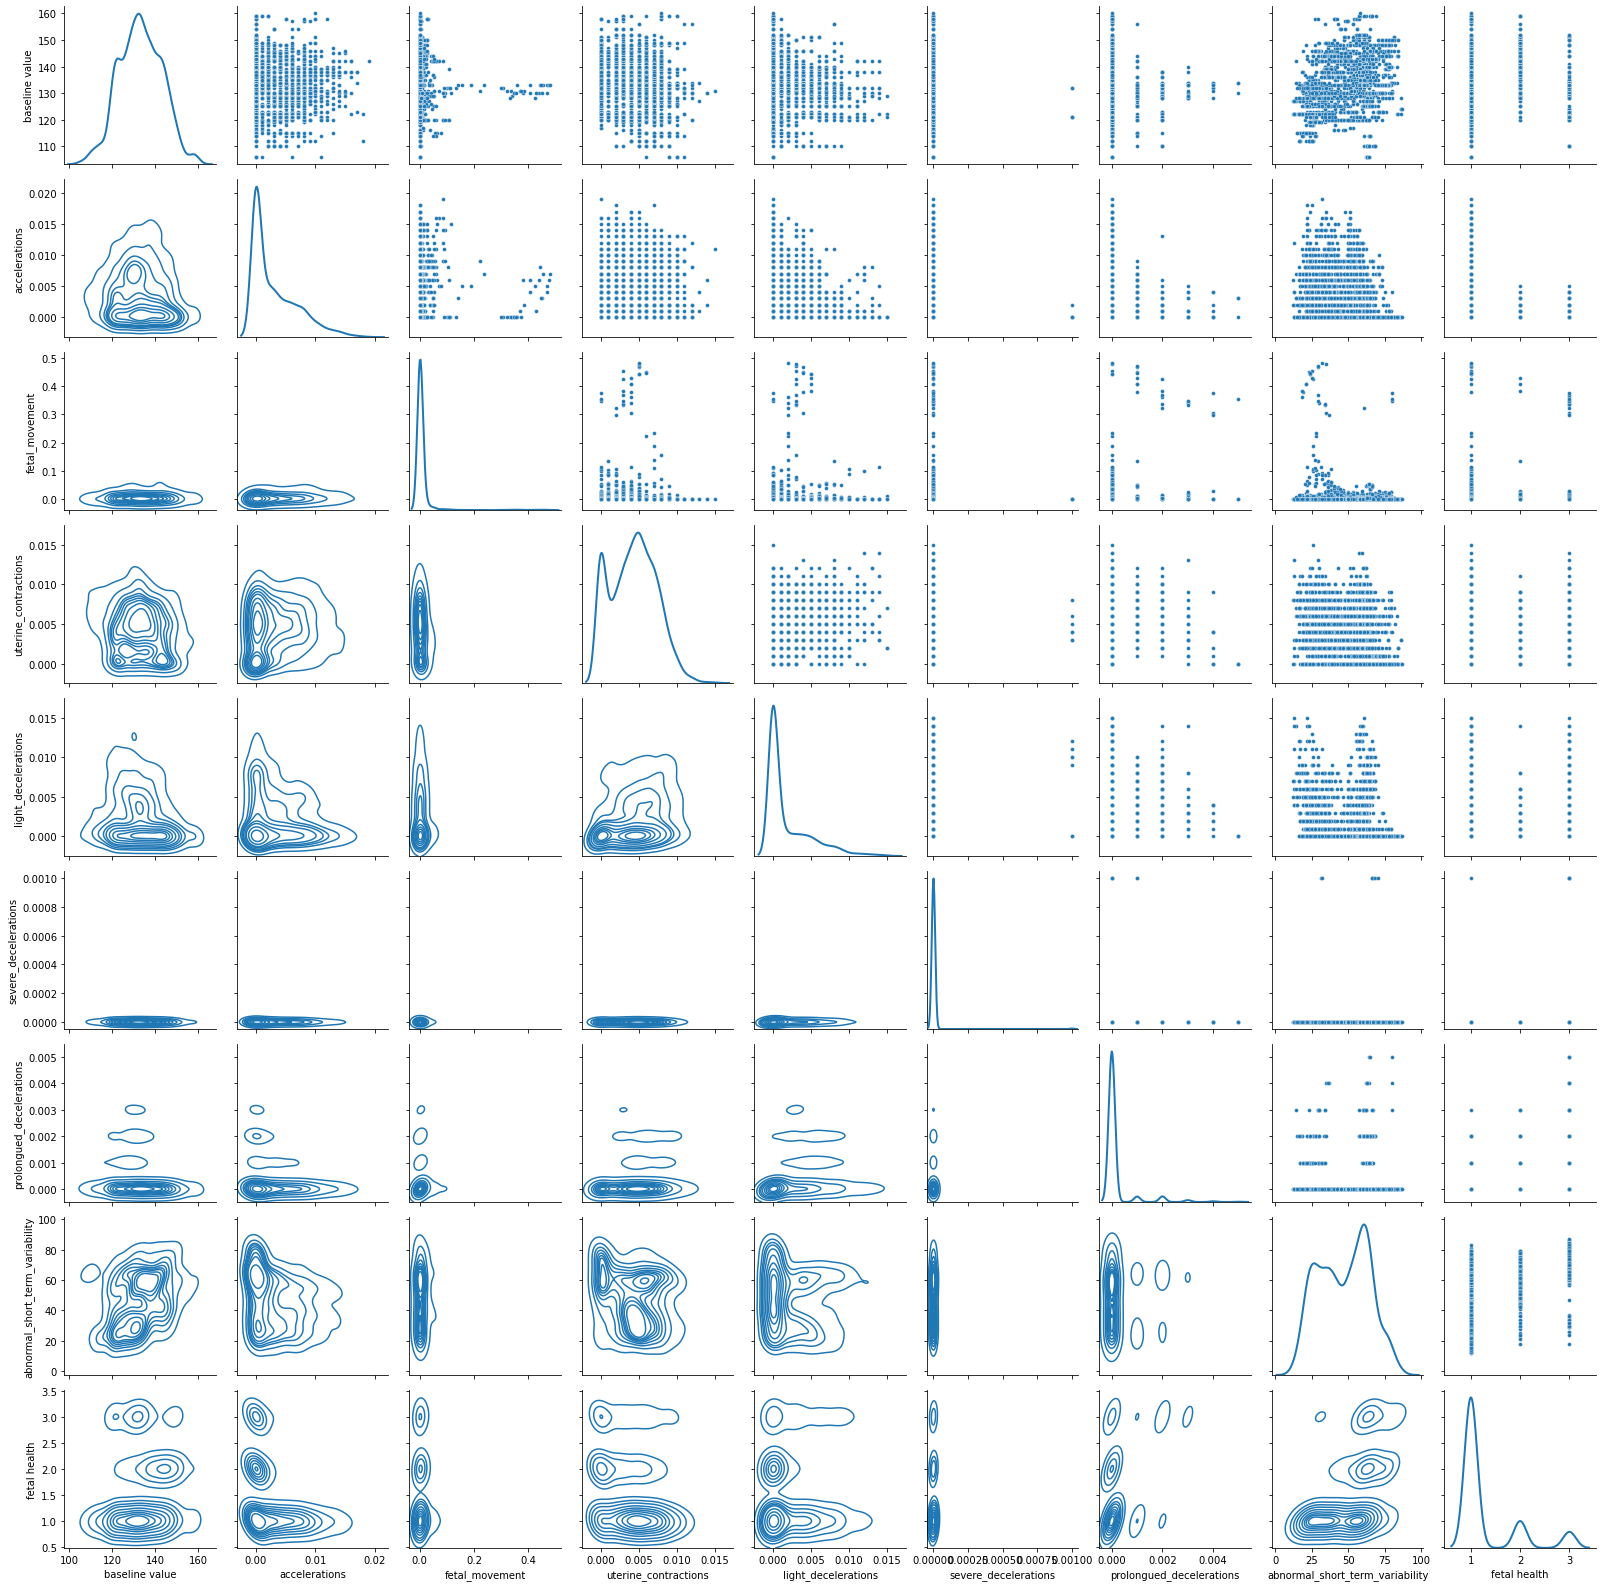

In [10]:
#Generate summary plots of data
g = sns.PairGrid(data_necessary, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

Problems:
* There is almost no significant correlations between the observables.
* Each observables are heavily skewed, can impact the accuracy and weightage of values predicted.

Solutions:
* Scale data to common feature scale (normal distribution).

In [11]:
#View summary statistics
data_necessary.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,fetal health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,3.000000


In [12]:
#Drop class from rest of attributes
X = data_necessary.drop(['fetal health'], axis = 1)
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0


In [34]:
#View class samples
y = data_necessary['fetal health']
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal health, dtype: int64

Problem:
* Overly imbalanced classes, more weightage and samples for Fetal Health "1".
* Predictions made could be heavily biased and weighted in favour of the higher class "1".

Solution:
* Bring all samples to the same scale (resample our training sets).

## Pre-process data
------

In [35]:
# Resample our data to have the same number of samples in each class, preventing bias towards larger classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [36]:
#View resamples X set (training and testing)
X_res

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,73.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.0,0.000000,17.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.0,0.000000,16.000000
...,...,...,...,...,...,...,...,...
4960,146.000000,0.000000,0.002657,0.000000,0.000000,0.0,0.000000,81.343463
4961,128.000000,0.000000,0.022697,0.003000,0.002616,0.0,0.003000,32.464644
4962,122.912473,0.000000,0.000000,0.001088,0.000000,0.0,0.000000,84.912473
4963,122.738106,0.000000,0.000000,0.001262,0.000000,0.0,0.000000,84.738106


In [18]:
#View y set (training and testing)
y_res

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4960    3.0
4961    3.0
4962    3.0
4963    3.0
4964    3.0
Name: fetal health, Length: 4965, dtype: float64

In [19]:
#Consistent samples 
y_res.value_counts()

1.0    1655
2.0    1655
3.0    1655
Name: fetal health, dtype: int64

In [20]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [21]:
#Scale data to common feature scale
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
#Optimize model by hyperparameter tuning using Grid Search 
#Specify pipeline parameters 
tuned_parameters = [{'kernel': ['rbf', 'linear', 'poly'], 'gamma': [1, 0.1, 0.01, 0.001],
                     'C': [1, 10, 100]}]

#initialize grid search instance
clf = GridSearchCV(SVC(), tuned_parameters,  scoring='accuracy', verbose=10)

#fit grid search using training sets
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START C=1, gamma=1, kernel=rbf...................................
[CV 1/5; 1/36] END ....C=1, gamma=1, kernel=rbf;, score=0.883 total time=   0.5s
[CV 2/5; 1/36] START C=1, gamma=1, kernel=rbf...................................
[CV 2/5; 1/36] END ....C=1, gamma=1, kernel=rbf;, score=0.904 total time=   0.5s
[CV 3/5; 1/36] START C=1, gamma=1, kernel=rbf...................................
[CV 3/5; 1/36] END ....C=1, gamma=1, kernel=rbf;, score=0.915 total time=   0.6s
[CV 4/5; 1/36] START C=1, gamma=1, kernel=rbf...................................
[CV 4/5; 1/36] END ....C=1, gamma=1, kernel=rbf;, score=0.908 total time=   0.7s
[CV 5/5; 1/36] START C=1, gamma=1, kernel=rbf...................................
[CV 5/5; 1/36] END ....C=1, gamma=1, kernel=rbf;, score=0.912 total time=   0.8s
[CV 1/5; 2/36] START C=1, gamma=1, kernel=linear................................
[CV 1/5; 2/36] END .C=1, gamma=1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'linear', 'poly']}],
             scoring='accuracy', verbose=10)

In [23]:
#find best parameters
clf.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [38]:
#initialize support vector model
svm = SVC(kernel='rbf', C = 100, gamma = 1) # Linear Kernel

#Train the model using the training sets
svm.fit(X_train, y_train)

SVC(C=100, gamma=1)

In [39]:
#For test set
y_pred = svm.predict(X_test)

#Print model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9355704697986578


In [40]:
#Place in dataframe for readability
df = pd.DataFrame({'Predicted':y_pred, 'Actual': y_test})
df

,Predicted,Actual
3137,2.0,2.0
393,2.0,1.0
1164,1.0,1.0
4332,3.0,3.0
731,1.0,1.0
...,...,...
3292,2.0,2.0
4119,3.0,3.0
1315,1.0,1.0
1945,3.0,3.0


In [41]:
#View classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.91      0.93       520
         2.0       0.89      0.93      0.91       485
         3.0       0.96      0.97      0.96       485

    accuracy                           0.94      1490
   macro avg       0.94      0.94      0.94      1490
weighted avg       0.94      0.94      0.94      1490



High precision and recall scores indicate that most relevant instances are retrieved and most instances retrieved were relevant.

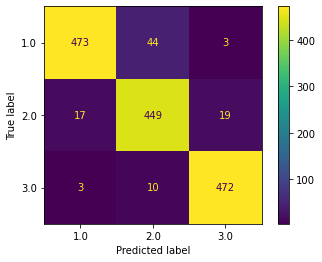

In [42]:
#View confusion matrix
a = plot_confusion_matrix(clf, X_test, y_test)
a

<function matplotlib.pyplot.show(close=None, block=None)>

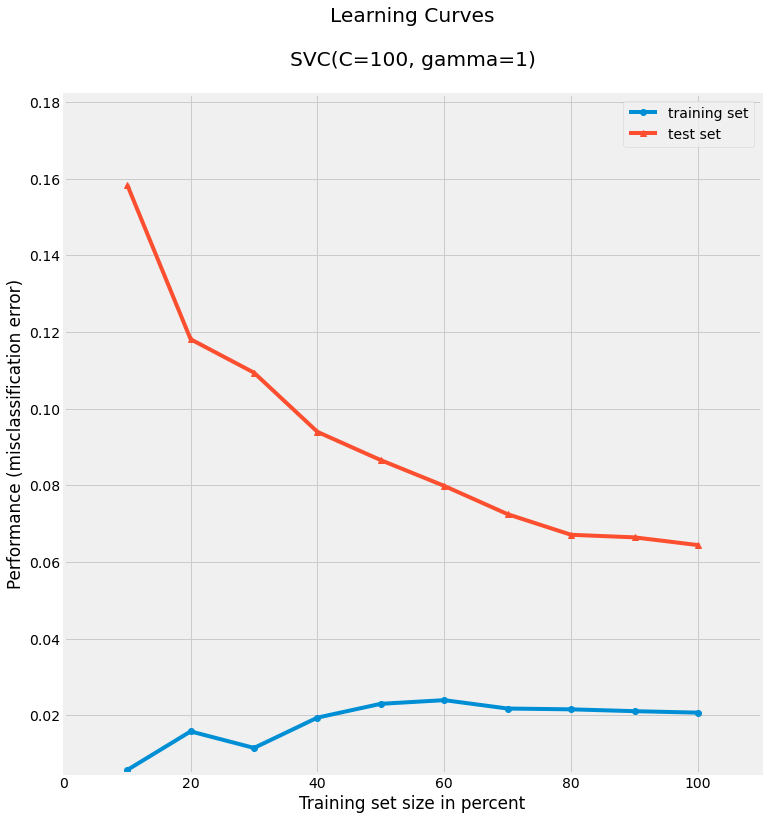

In [29]:
plt.figure(figsize=(12.5,12.5))
a = plot_learning_curves(X_train, y_train, X_test, y_test, svm)
plt.show

Our model didn't show signs of overfitting nor underfitting hence in accordance to the Bias-Variance Trade-off,
we ensured our model minimized our varaince whilst increasing our bias enough to reach an optimal zone. The training set increased but eventaully decreased, stabilizing to a certain point similar to the test set as it began decreasing eventually converging and stabilizing to an error of roughly 0.063. Both learning curves has no significantly large gap between them (didn't underfit) and the training set didn't increase in error after larger set sizes (didn't overfit).  

In [30]:
#For train set
y_pred = svm.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9792805755395684


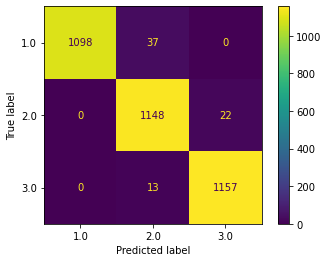

In [44]:
#Plot confusion matrix for training set
plot_confusion_matrix(svm, X_train, y_train)

#### Thus, we obtained a classifier that achieved an accuracy rate of 93.56% and a 6.44% error rate. This means that our classifier when new test data is fed through, the classifier has the ability to correctly classify fetal health roughly 94% of the time. With high precision and recall scores, the number of retreived fetal health labels will be relevant and similarly, majority of relevant fetal health labels will be retrieved.